# **Liveness Detection**
By : Reynara Ezra Pratama

Dataset : [CelebA Spoof](https://www.kaggle.com/attentionlayer241/celeba-spoof-for-face-antispoofing)

## Import Library

In [1]:
import zipfile, os

local_zip = r'D:\Python\Projects\face-reidentification\liveness_detect\Dataset 600 Images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(r'D:\Python\Projects\face-reidentification\liveness_detect\Data600')
zip_ref.close()

In [2]:
print(os.listdir(r'D:\Python\Projects\face-reidentification\liveness_detect\Data600'))

['Live', 'Spoof']


## Check Data

In [3]:
print('Number of Real Images : {}'.format(len(os.listdir(r'D:\Python\Projects\face-reidentification\liveness_detect\Data600\Live'))))
print('Number of Spoof Images : {}'.format(len(os.listdir(r'D:\Python\Projects\face-reidentification\liveness_detect\Data600\Spoof'))))
print('Total Images : {}'.format(
    len(os.listdir(r'D:\Python\Projects\face-reidentification\liveness_detect\Data600\Live')) +
    len(os.listdir(r'D:\Python\Projects\face-reidentification\liveness_detect\Data600\Spoof'))
    )
)

Number of Real Images : 300
Number of Spoof Images : 300
Total Images : 600


## Split Data Into Training and Testing

In [4]:
import splitfolders
splitfolders.ratio(r'D:\Python\Projects\face-reidentification\liveness_detect\Data600',
                   r'D:\Python\Projects\face-reidentification\liveness_detect\Data600\Data',
                   seed=42,
                   ratio=(0.8, 0.2))

Copying files: 600 files [00:00, 2342.90 files/s]


In [5]:
base_dir = r'D:\Python\Projects\face-reidentification\liveness_detect\Data600\Data'
train_dir = os.path.join(base_dir, 'train') ## Train Dataset
validation_dir = os.path.join(base_dir, 'val') ## Validation Dataset

In [6]:
os.listdir(r'D:\Python\Projects\face-reidentification\liveness_detect\Data600\Data\train')

['Live', 'Spoof']

In [7]:
os.listdir(r'D:\Python\Projects\face-reidentification\liveness_detect\Data600\Data\val')

['Live', 'Spoof']

In [8]:
train_live_dir = os.path.join(train_dir, 'Live')
train_spoof_dir = os.path.join(train_dir, 'Spoof')

validation_live_dir = os.path.join(validation_dir, 'Live')
validation_spoof_dir = os.path.join(validation_dir, 'Spoof')

## Check Train and Test Data

**Train Data**

In [9]:
total_size_train = (
    len(os.listdir(r'D:\Python\Projects\face-reidentification\liveness_detect\Data600\Data\train\Live')) +
    len(os.listdir(r'D:\Python\Projects\face-reidentification\liveness_detect\Data600\Data\train\Spoof'))
)
print('Total Training Data is : {}'.format(total_size_train))

Total Training Data is : 480


**Test Data**

In [10]:
total_size_test = (
    len(os.listdir(r'D:\Python\Projects\face-reidentification\liveness_detect\Data600\Data\val\Live')) +
    len(os.listdir(r'D:\Python\Projects\face-reidentification\liveness_detect\Data600\Data\val\Spoof'))
)
print('Total Testing Data is : {}'.format(total_size_test))

Total Testing Data is : 120


## Image Augmentation

In [11]:
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.2,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (128, 128),
    #batch_size = 128,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (128, 128),
    #batch_size = 128,
    class_mode = 'binary'
)

Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


## Construct Model Using CNN

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,601,153 (9.92 MB)

 Trainable params: 2,601,153 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from keras._tf_keras.keras.models import Sequential
from keras import layers

model_1 = Sequential([
# first CONV => RELU => CONV => RELU => POOL layer set                                   
  layers.Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)),
  #layers.BatchNormalization(1),
  layers.Conv2D(16, (3, 3), activation='relu', padding="same"),
  #layers.BatchNormalization(1),
  layers.MaxPool2D(2,2),
  layers.Dropout(0.25),

# second CONV => RELU => CONV => RELU => POOL layer set
  layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
  #layers.BatchNormalization(1),
  layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
  #layers.BatchNormalization(1),
  layers.MaxPool2D(2,2),
  layers.Dropout(0.25),

# first (and only) set of FC => RELU layers
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  #layers.BatchNormalization(1),
  layers.Dropout(0.5),

# softmax classifier
  layers.Dense(1, activation='sigmoid')
])

In [17]:
model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [18]:
history_1 = model_1.fit(
    train_generator,
    epochs = 20,
    #callbacks = [reduce_LR, stop_early],
    validation_data = validation_generator,
    batch_size=8
)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.4796 - loss: 1.0483 - val_accuracy: 0.6083 - val_loss: 0.6878
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.5310 - loss: 0.6632 - val_accuracy: 0.8000 - val_loss: 0.6320
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.7379 - loss: 0.5783 - val_accuracy: 0.8500 - val_loss: 0.4977
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.8181 - loss: 0.4298 - val_accuracy: 0.7500 - val_loss: 0.5848
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.8222 - loss: 0.4259 - val_accuracy: 0.8250 - val_loss: 0.4803
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.8572 - loss: 0.3830 - val_accuracy: 0.8917 - val_loss: 0.4084
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.9140 - loss: 0.2929 - val_accuracy: 0.8167 - val_loss: 0.5723
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.9049 - loss: 0.2756 - val_accuracy: 0.

## Plot Model History

In [19]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
  plt.figure(figsize=(18,5))
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plot_acc = plt.plot(epochs, acc, 'red', label='Training Accuracy')
  plot_val_acc = plt.plot(epochs, val_acc, 'blue', label='Validation Accuracy')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Accuracy', fontsize=15)
  plt.title('Training and Validation Accuracy', fontsize=25)
  plt.legend(bbox_to_anchor=(1,1), loc='best')
  plt.grid()
  plt.show()

def plot_loss(history):
  plt.figure(figsize=(18,5))
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plot_loss = plt.plot(epochs, loss, 'red', label='Training Loss')
  plot_val_loss = plt.plot(epochs, val_loss, 'blue', label='Validation Loss')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Loss', fontsize=15)
  plt.title('Training and Validation Loss', fontsize=25)
  plt.legend(bbox_to_anchor=(1,1), loc='best')
  plt.grid()
  plt.show()

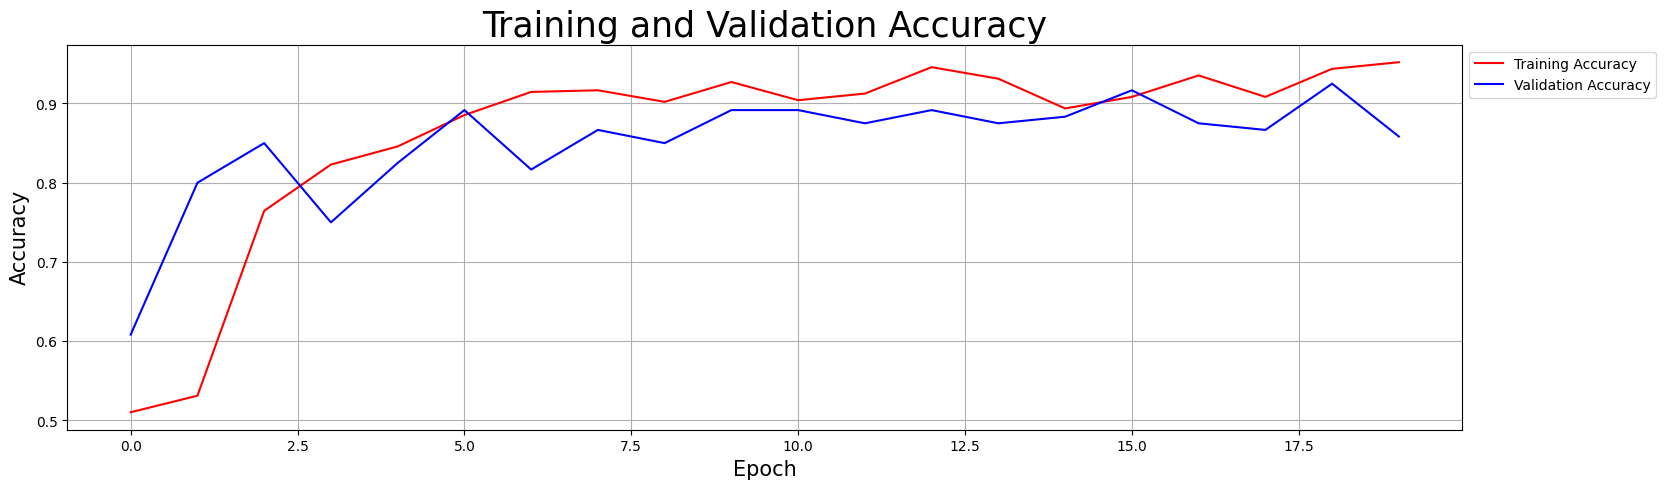

In [21]:
plot_accuracy(history_1)

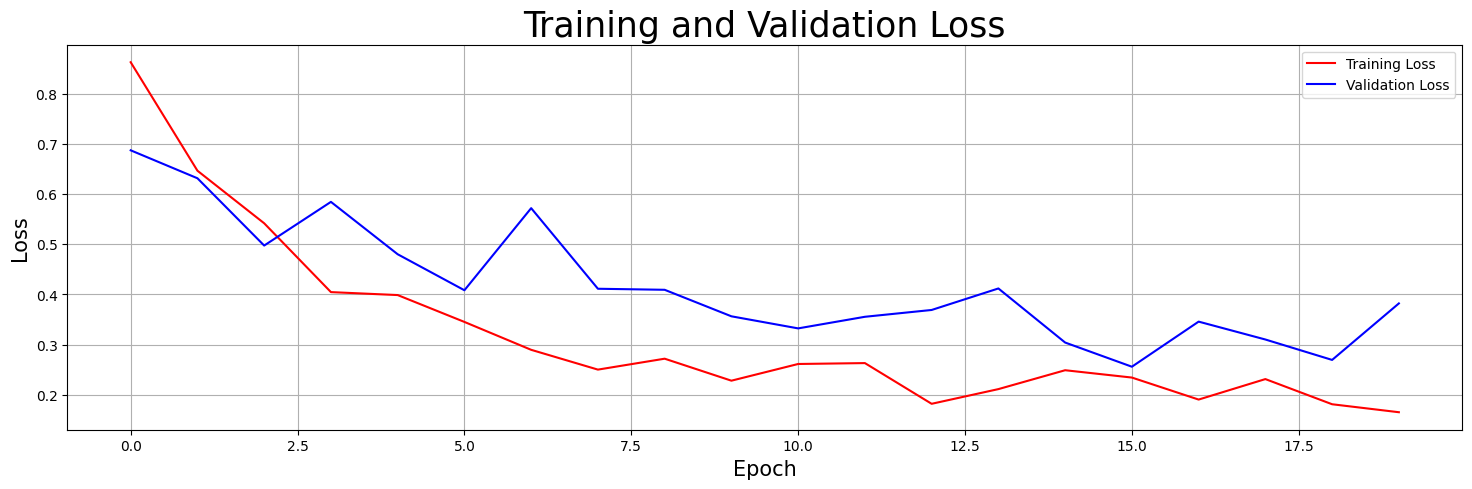

In [23]:
plot_loss(history_1)

In [25]:
model_1.save('model_1.h5')